## Install dependencies:

In [ ]:
import urllib.request
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

## Define Classes and labels:

In [ ]:
classes = ['Car','House','wine bottle','Chair','Table','Tree','camera','Fish','rain','Clock','Hat']
classes = [x.lower() for x in classes]
classes

['car',
 'house',
 'wine bottle',
 'chair',
 'table',
 'tree',
 'camera',
 'fish',
 'rain',
 'clock',
 'hat']

In [ ]:
# labels:
labels = {}

count = 0
for class_name in classes:
  labels[class_name] = count
  count += 1

labels

{'car': 0,
 'house': 1,
 'wine bottle': 2,
 'chair': 3,
 'table': 4,
 'tree': 5,
 'camera': 6,
 'fish': 7,
 'rain': 8,
 'clock': 9,
 'hat': 10}

## Download dataset:

In [ ]:
def download_dataset(num_images, classes):
    base = 'https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/'
    for c in classes:
        cls_url = c.replace(' ', '%20')
        path = base+cls_url+'.npy'
        print(path)
        urllib.request.urlretrieve(path, '/content/drive/MyDrive/DS Data /QuickDraw/data/'+c+'.npy')
        data = np.load('/content/drive/MyDrive/DS Data /QuickDraw/data/'+c+'.npy')
        print(data.shape)
        if len(data) > num_images:
            data = data[:num_images]
        np.save('/content/drive/MyDrive/DS Data /QuickDraw/data//'+c+'.npy', data)

In [ ]:
download_dataset(30000, classes)

https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/car.npy
(182764, 784)
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/cat.npy
(123202, 784)
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/computer.npy
(123885, 784)
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/house.npy
(135420, 784)
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/wine%20bottle.npy
(126373, 784)
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/sword.npy
(123802, 784)
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/bed.npy
(113862, 784)
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/chair.npy
(222706, 784)
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/table.npy
(128021, 784)
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/door.npy
(120230, 784)
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/cake.npy
(124905, 7

In [ ]:
for class_name in classes:
  target = labels[class_name]
  images = np.load('/content/drive/MyDrive/DS Data /QuickDraw/data/' + class_name + '.npy')
  images = images.reshape((-1, 28, 28))
  print(images.shape)

(30000, 28, 28)
(30000, 28, 28)
(30000, 28, 28)
(30000, 28, 28)
(30000, 28, 28)
(30000, 28, 28)
(30000, 28, 28)
(30000, 28, 28)
(30000, 28, 28)
(30000, 28, 28)
(30000, 28, 28)


## Build features and labels:

In [ ]:
num_classes = len(classes)
X = np.empty((0, 28, 28))
y = np.empty((0))

for class_name in classes:
  target = labels[class_name]
  images = np.load('/content/drive/MyDrive/DS Data /QuickDraw/data/' + class_name + '.npy')[:30000]
  images = images.reshape((-1, 28, 28))

  X = np.concatenate([X, images], axis=0)
  y = np.concatenate([y, np.full(images.shape[0], target)], axis=0)

In [ ]:
X

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [ ]:
y

array([ 0.,  0.,  0., ..., 10., 10., 10.])

In [ ]:
X.shape

(330000, 28, 28)

In [ ]:
y.shape

(330000,)

## Visualize:

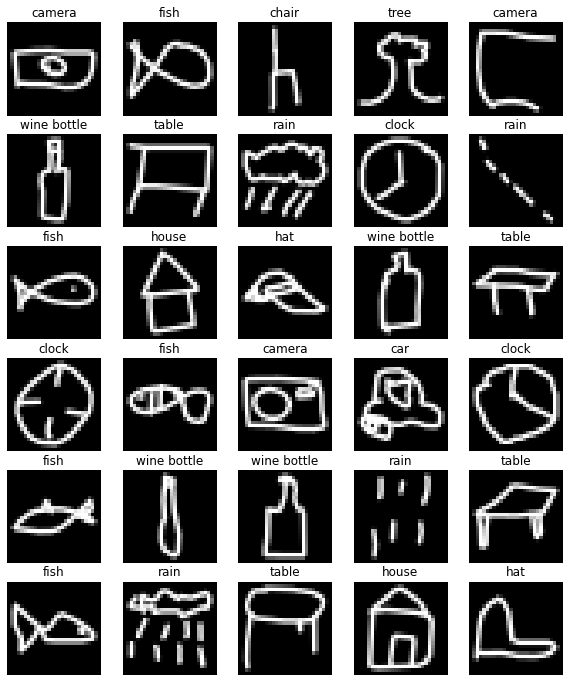

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate 200,000 random images of size 28x28
images = X

# Select 30 random images
indices = np.random.choice(30000 * num_classes, 30)

# Create a 6x5 subplot grid to display the images
fig, ax = plt.subplots(nrows=6, ncols=5, figsize=(10, 12))

# Flatten the 2D grid of axes objects into a 1D array
ax = ax.flatten()

# Loop through the selected images and display them in the grid
for i in range(len(indices)):
    ax[i].imshow(images[indices[i]], cmap='gray')
    ax[i].axis('off')
    label = [class_name for class_name, index in labels.items() if index == y[indices[i]]][0]
    ax[i].set_title(f"{label}")

# Hide any unused axes
for j in range(i+1, 6*5):
    ax[j].axis('off')

# Show the plot
plt.show()

## Train and Test Split:

In [ ]:
X = X/255

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=43)

In [ ]:
X_train.shape

(247500, 28, 28)

In [ ]:
X_train[0].shape

(28, 28)

## Model:

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
model = Sequential()

image_shape = (28,28,1) 
model.add(layers.Conv2D(
    input_shape=image_shape,
    kernel_size=5,
    filters=32,
    padding='same',
    activation='relu'
))
model.add(layers.MaxPooling2D())

model.add(layers.Conv2D(
    kernel_size=3,
    filters=32,
    padding='same',
    activation='relu',
))
model.add(layers.MaxPooling2D())

model.add(layers.Conv2D(
    kernel_size=3,
    filters=64,
    padding='same',
    activation= 'relu'
))
model.add(layers.MaxPooling2D())

model.add(layers.Flatten())

model.add(layers.Dense(
    units=512,
    activation='relu'
))

model.add(layers.Dense(
    units=len(classes),
    activation='softmax'
))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 7, 7, 64)          18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 3, 3, 64)        

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train, y_train, epochs=5)      

Epoch 1/5


/usr/local/lib/python3.9/dist-packages/keras/backend.py:5585: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


7735/7735 [==============================] - 390s 50ms/step - loss: 0.2018 - accuracy: 0.9414
Epoch 2/5
7735/7735 [==============================] - 382s 49ms/step - loss: 0.1225 - accuracy: 0.9639
Epoch 3/5
7735/7735 [==============================] - 377s 49ms/step - loss: 0.1026 - accuracy: 0.9693
Epoch 4/5
7735/7735 [==============================] - 375s 48ms/step - loss: 0.0885 - accuracy: 0.9735
Epoch 5/5
7735/7735 [==============================] - 373s 48ms/step - loss: 0.0770 - accuracy: 0.9764


In [ ]:
model.evaluate(X_test, y_test)      # accuracy = 96%

2579/2579 [==============================] - 36s 14ms/step - loss: 0.1235 - accuracy: 0.9644


[0.12345795333385468, 0.9643515348434448]

## Save the model:

In [ ]:
model_name = 'sketch_recogination_model_cnn.h5'
model.save(model_name, save_format='h5')

## Load the model:

In [ ]:
from keras.models import load_model
model = load_model('sketch_recogination_model_cnn.h5')

## Prediction:

In [ ]:
def predict(image):
  image = image.reshape(1,28,28,1)
  print(image.shape)
  
  label = (model.predict(image).reshape(num_classes))   # giving 2D output so 1D
  label = tf.constant(label)
  print(label)
  predicted_index = tf.argmax(label)
  class_name = [name for name, index in labels.items() if predicted_index == index][0]
  return class_name

In [ ]:
predict(X_test[3])

(1, 28, 28, 1)
1/1 [==============================] - 0s 126ms/step
tf.Tensor(
[4.1958680e-05 7.3654097e-05 9.9348963e-06 1.2464391e-04 4.5056324e-05
 6.9341941e-06 9.9935144e-01 1.9277354e-04 6.2248056e-08 1.1549817e-04
 3.8082173e-05], shape=(11,), dtype=float32)


'camera'

In [ ]:
X_test[3].shape

(28, 28)

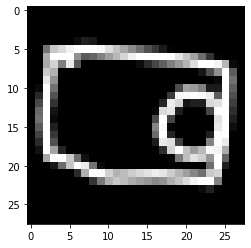

In [ ]:
plt.imshow(X_test[3], cmap='gray')

In [ ]:
[name for name, index in labels.items() if y_test[3] == index][0]

'camera'

## Application:

In [ ]:
def predict_fn(image):

  # preprocessing the size:
  # Load image with shape (150, 300, 3)
  resized_image = tf.image.resize(image, (28, 28))              # Resize image to (28, 28)
  grayscale_image = tf.image.rgb_to_grayscale(resized_image)    # Convert image to grayscale
  # final_image = tf.expand_dims(grayscale_image, axis=-1)        # Add extra dimension to image

  image = np.array(grayscale_image)
  # print(image.shape)

  # model requirements:
  image = image.reshape(1,28,28,1)
  # print(image.shape)

  plt.imshow(image.reshape(28,28,1), cmap='gray')
  label = tf.constant(model.predict(image).reshape(num_classes))   # giving 2D output so 1D
  # print(label)
  # --
  # all
  # predictions = (model.predict(image).reshape(-1))   # giving 2D output so 1D
  # predictions = predictions.tolist()
  # print(predictions)
  # confidences = {class_name: predictions[labels[class_name]] for class_name in labels}
  # return confidences

  # ---


  # predict:
  predicted_index = tf.argmax(label)
  class_name = [name for name, index in labels.items() if predicted_index == index][0]
  return class_name

In [ ]:
import gradio as gr

gr.Interface(fn=predict_fn, 
             inputs="paint", 
             outputs="label", height=100).launch(share=True, debug=True)


/usr/local/lib/python3.9/dist-packages/gradio/deprecation.py:40: UserWarning: `height` is deprecated in `Interface()`, please use it within `launch()` instead.
  warnings.warn(value)


Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://1a4a22c6dc89774104.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://1a4a22c6dc89774104.gradio.live


In [ ]:
pip install -U gradio
